In [100]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
%autoreload
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '../')
from constants import *
from utilities_lightGBM import *
from utilities import *

In [186]:
hyperparameters = {
    'colsample_bytree': 0.7,    # Fraction of features to be considered for each split
    'learning_rate': 0.01,      # Reduced learning rate for more gradual learning
    'max_depth': 4,             # Increased depth to allow capturing more complex patterns
    'n_estimators': 800,        # Increased number of trees
    'objective': 'regression',  # Objective function
    'subsample': 0.7,           # Fraction of data to be used for each tree
    'min_data_in_leaf': 10,     # Minimum data in leaf for additional regularization
    #'num_leaves': 40            # Adjusted number of leaves
}



In [187]:
selected_features_a = selected_features.copy()
hyperparameters_a = hyperparameters
wanted_months_a = wanted_months

In [188]:
X_train_a_prep = prepare_X(X_observed_a, X_estimated_a, selected_features_a, wanted_months_a)
X_train_a, y_train_a = resize_training_data(X_train_a_prep, y_a)
X_test_a_prep = prepare_testdata_rf_a(X_test_a, selected_features_a)

In [189]:
# Replace or remove special JSON characters in feature names
X_train_a.columns = [col.replace('{', '').replace('}', '').replace('[', '').replace(']', '').replace(':', '') for col in X_train_a.columns]

In [190]:
lightGBM_a = lightGBM_model(hyperparameters_a, X_train_a, X_test_a_prep, y_train_a)

In [191]:
lightGBM_a_cross_val_predictions, lightGBM_a_cross_val_actuals, lightGBM_a_cross_val_mae_mean = lightGBM_a.cross_val_stack(X_train_a, y_train_a)

In [192]:
#lightGBM_a.cross_validate(X_train_a, y_train_a)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8388
[LightGBM] [Info] Number of data points in the train set: 22684, number of used features: 38
[LightGBM] [Info] Start training from score 869.084134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

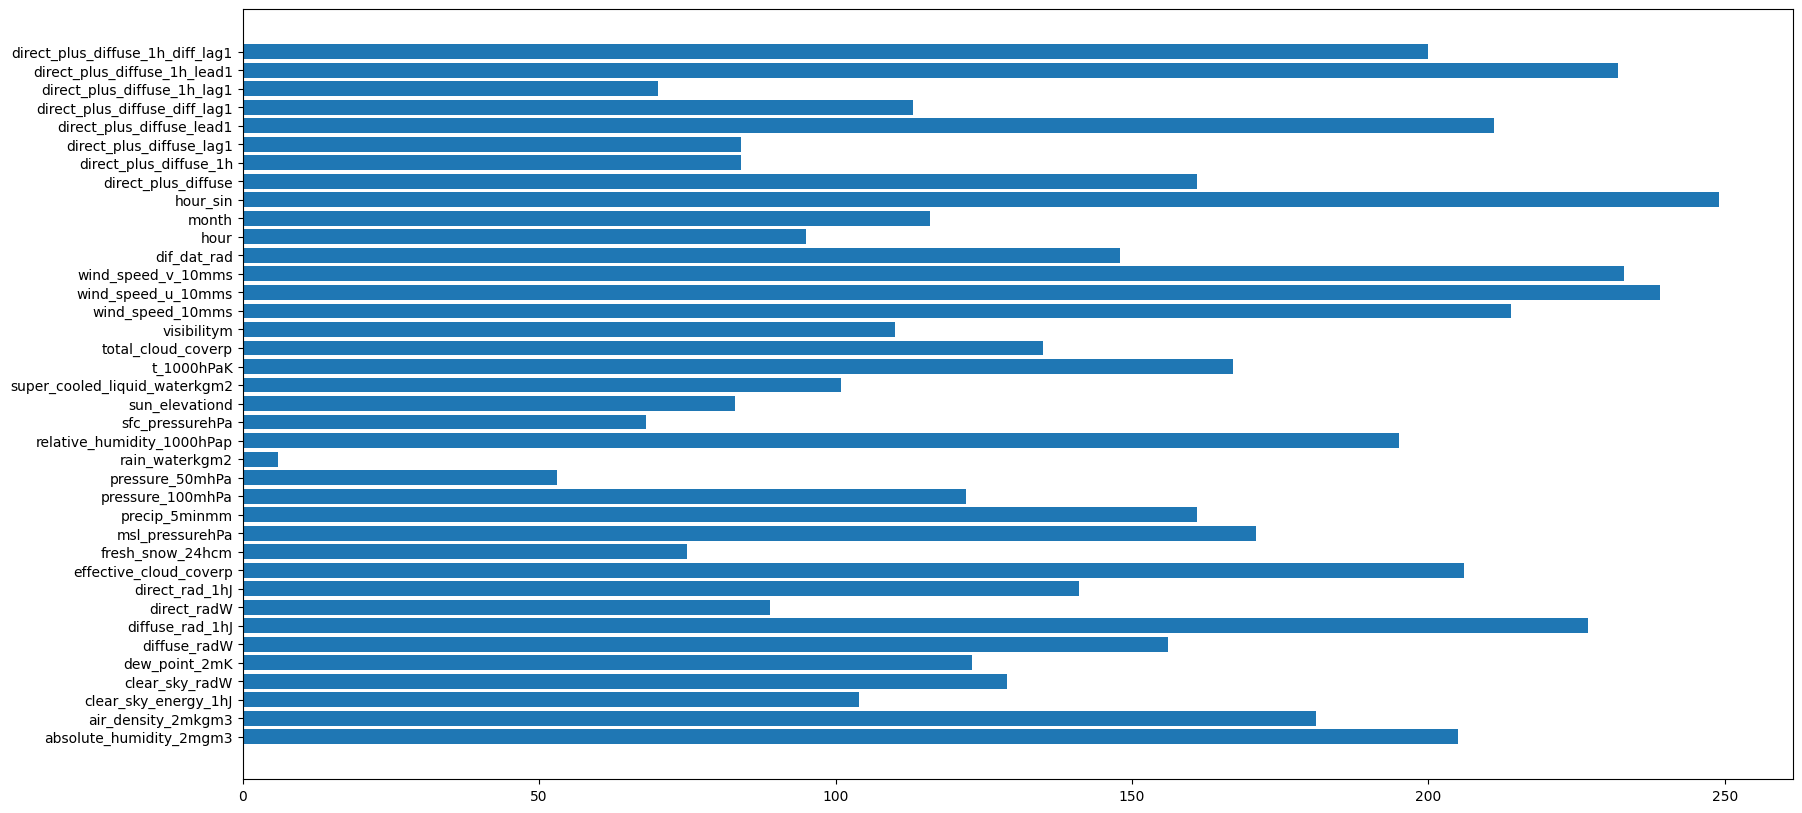

In [82]:
lightGBM_a.fit()
lightGBM_a.pred()
lightGBM_a_test_pred = lightGBM_a.prediction
lightGBM_a.feature_importence_plot()

# Dataset B

In [193]:
selected_features_b = selected_features.copy()
hyperparameters_b = hyperparameters
wanted_months_b = wanted_months

In [231]:
hyperparameters_b = {
    'colsample_bytree': 0.7,    # Fraction of features to be considered for each split
    'learning_rate': 0.01,      # Reduced learning rate for more gradual learning
    'max_depth': 4,             # Increased depth to allow capturing more complex patterns
    'n_estimators': 600,        # Increased number of trees
    'objective': 'regression',  # Objective function
    'subsample': 0.7,           # Fraction of data to be used for each tree
    'min_data_in_leaf': 10,     # Minimum data in leaf for additional regularization
    #'num_leaves': 40            # Adjusted number of leaves
}

In [232]:
X_train_b_prep = prepare_X(X_observed_b.copy(), X_estimated_b.copy(), selected_features_b, wanted_months_b)
X_train_b, y_train_b = resize_training_data(X_train_b_prep, y_b)
X_test_b_prep = prepare_testdata_rf_a(X_test_b, selected_features_b)

In [233]:
X_train_b.columns = [col.replace('{', '').replace('}', '').replace('[', '').replace(']', '').replace(':', '') for col in X_train_b.columns]

In [234]:
lightGBM_b = lightGBM_model(hyperparameters_b, X_train_b, X_test_b_prep, y_train_b)

In [235]:
lightGBM_b_cross_val_predictions,lightGBM_b_cross_val_actuals, lightGBM_b_cross_val_mae_mean = lightGBM_b.cross_val_stack(X_train_b, y_train_b)

In [236]:
#lightGBM_b.cross_validate(X_train_b, y_train_b)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8232
[LightGBM] [Info] Number of data points in the train set: 16518, number of used features: 38
[LightGBM] [Info] Start training from score 159.860167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

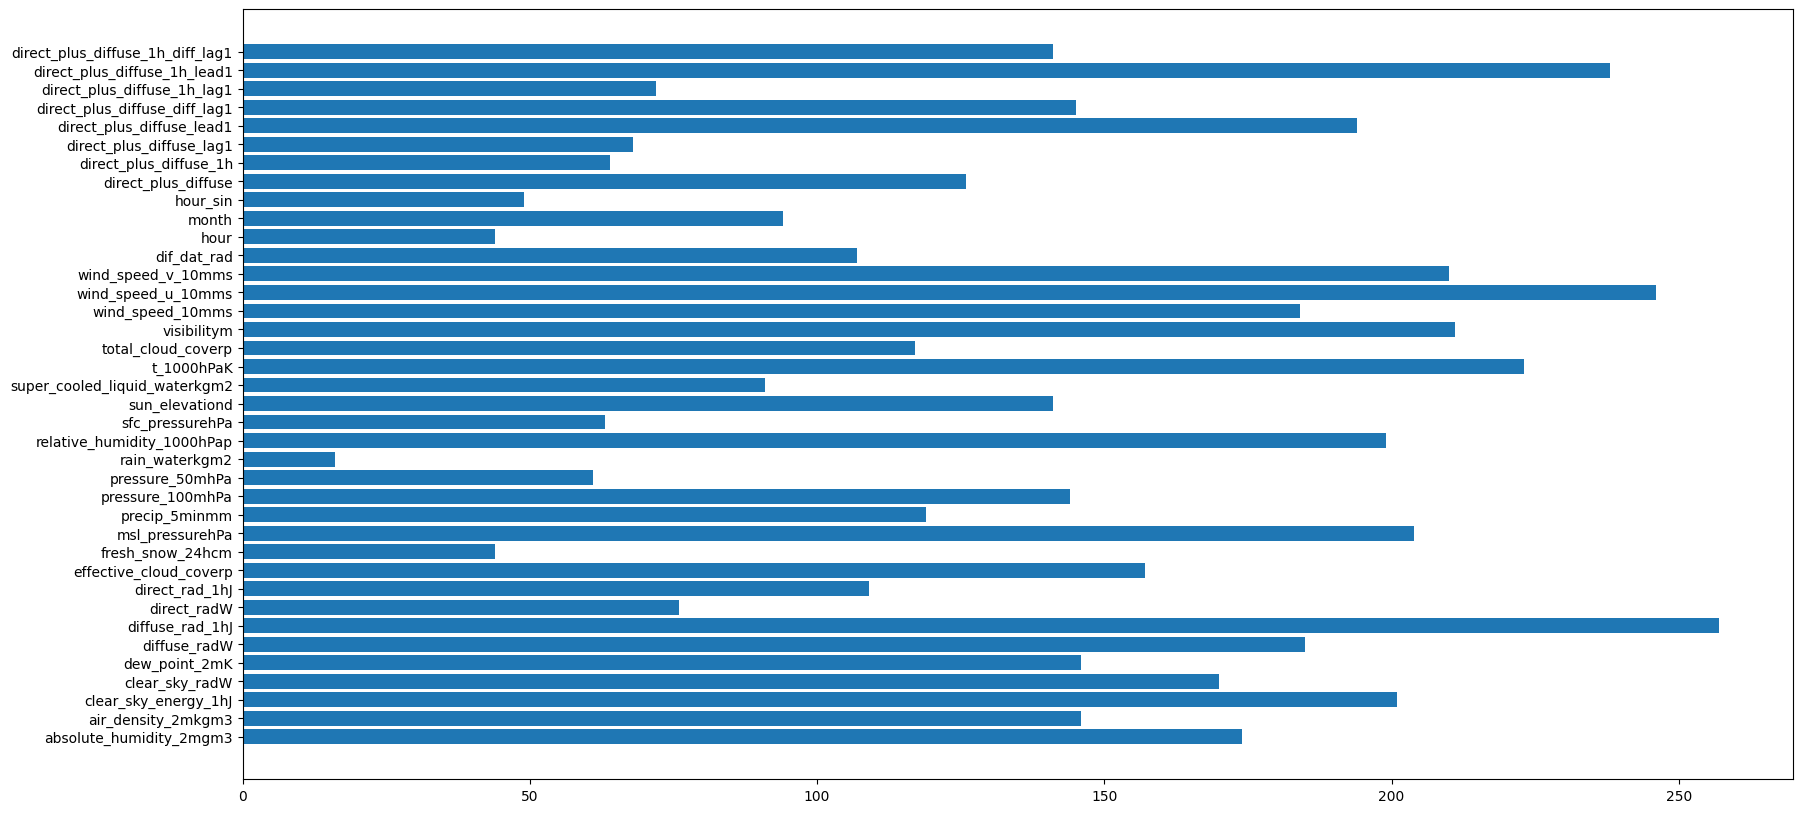

In [89]:
lightGBM_b.fit()
lightGBM_b.pred()
lightGBM_b_test_pred = lightGBM_b.prediction
lightGBM_b.feature_importence_plot()

# Dataset C

In [237]:
selected_features_c = selected_features.copy()
hyperparameters_c = hyperparameters
wanted_months_c = wanted_months

In [257]:
hyperparameters_ = {
    'colsample_bytree': 0.7,    # Fraction of features to be considered for each split
    'learning_rate': 0.01,      # Reduced learning rate for more gradual learning
    'max_depth': 4,             # Increased depth to allow capturing more complex patterns
    'n_estimators': 500,        # Increased number of trees
    'objective': 'regression',  # Objective function
    'subsample': 0.7,           # Fraction of data to be used for each tree
    'min_data_in_leaf': 10,     # Minimum data in leaf for additional regularization
    #'num_leaves': 40            # Adjusted number of leaves
}

In [258]:
X_train_c_prep = prepare_X(X_observed_c, X_estimated_c, selected_features_c, wanted_months_c)
X_train_c, y_train_c = resize_training_data(X_train_c_prep, y_c)
X_test_c_prep = prepare_testdata_rf_a(X_test_c, selected_features_c)

In [259]:
X_train_c.columns = [col.replace('{', '').replace('}', '').replace('[', '').replace(']', '').replace(':', '') for col in X_train_c.columns]

In [260]:
lightGBM_c = lightGBM_model(hyperparameters_c, X_train_c, X_test_c_prep, y_train_c)

In [261]:
lightGBM_c_cross_val_predictions,lightGBM_c_cross_val_actuals, lightGBM_c_cross_val_mae_mean = lightGBM_c.cross_val_stack(X_train_c, y_train_c)

In [262]:
#lightGBM_c.cross_validate(X_train_c, y_train_c)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013332 seconds.
You can set `force_row_wise=true` to remov

In [96]:
lightGBM_c.fit()
lightGBM_c.pred()
lightGBM_c_test_pred = lightGBM_c.prediction

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8247
[LightGBM] [Info] Number of data points in the train set: 14698, number of used features: 38
[LightGBM] [Info] Start training from score 129.083496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi